# Unsupervised Learning Lab

In this lab you will work through several examples of methods and applications of unsupervised learning. We will be working with the **Digits** dataset of of handwritten numbers. This dataset is convenient because Scikit-learn provides it built-in.

**NOTE**: I do not explicitly *ask* for your analyses in this notebook, but you should definitely provide them!

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

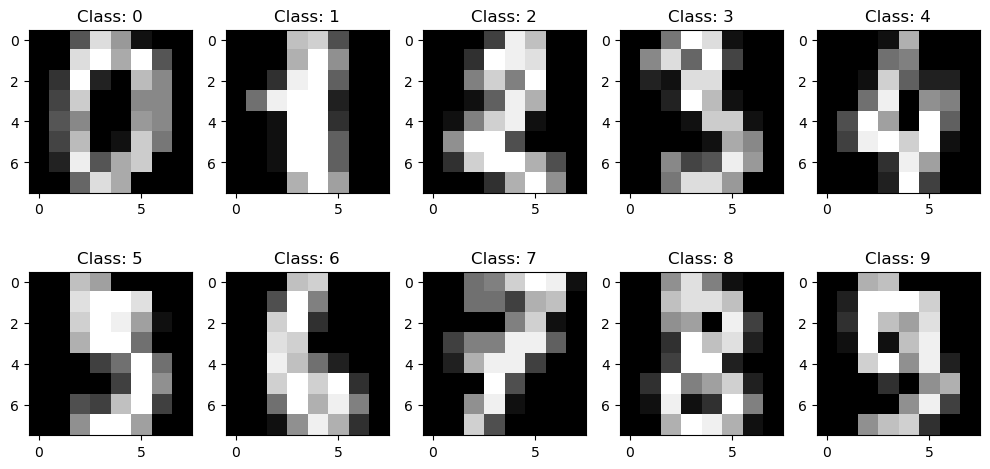

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the digits dataset and extract data and labels.
ds_digits = load_digits()
Xs = ds_digits.data
ys = ds_digits.target

scaler = StandardScaler()
Xs = scaler.fit_transform(Xs)

# Create a pandas DataFrame 'df_digits' to hold the dataset's features.
# Note: This dataset doesn't have column names as it represents image pixel values.
df_digits = pd.DataFrame(ds_digits.data)

# Create a pandas Series 'targets_digits' to store the target labels of the dataset.
targets_digits = pd.Series(ds_digits.target)

# Print the description of the dataset using 'DESCR' attribute of 'ds_digits'.
print(ds_digits['DESCR'])

# Print the statistical summary of the features in the dataset using 'describe' method of 'df_digits'.
print(df_digits.describe())

# Access and print the column names (feature names) of the dataset using 'feature_names' attribute of 'ds_digits'.
column_names = ds_digits['feature_names']
print(column_names)

# Create a 5x5 grid of subplots with a defined figure size
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Plot the 10 classes and their corresponding labels in the dataset
for i in range(10):
    row = i // 5  # Determine the row position (0 to 4)
    col = i % 5   # Determine the column position (0 to 4)

    # Display the image using grayscale colormap
    axes[row, col].imshow(ds_digits.images[i], cmap='gray')

    # Set the title for the subplot with the image label
    axes[row, col].set_title(f"Class: {ds_digits.target[i]}")

# Adjust the spacing between subplots for better layout
plt.tight_layout()

# Display the subplots
plt.show()

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is an integer in the range
0..16. This reduces dimensionality and gives invariance to small
distortions.

For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G.
T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C.
L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469,
1994.

.. topic:: References

  - C. Kaynak (1995) Methods of Combining Multiple Classifiers and Their
    Applications to Handwritten Digit Recognition, MSc Thesis, Institute of
    Graduate Studies in Science and Engineering, Bogazici University.
  - E. Alpaydin, C. Kaynak (1998) Cascading Classifiers, Kybernetika.
  - Ken Tang and Ponnuthurai N. Suganthan and Xi Yao and A. Kai Qin.
    Linear dimensionalityreduction using relevance weighted LDA. School of
    Electrical and Electronic Engineering Nanyang Technological University.
    2005.
  - Claudio Gentile. A New Approximate Maximal Margin Classification
    Algorithm. NIPS. 2000.

           0            1            2            3            4   \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

                5            6            7            8            9   ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       4.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      11.000000     0.000000     0.000000     0.000000     3.000000  ...   
max      16.000000    16.000000    15.000000     2.000000    16.000000  ...   

                54           55           56           57           58  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000   
mean      3.725097     0.206455     0.000556     0.279354     5.557596   
std       4.919406     0.984401     0.023590     0.934302     5.103019   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       1.000000     0.000000     0.000000     0.000000     4.000000   
75%       7.000000     0.000000     0.000000     0.000000    10.000000   
max      16.000000    13.000000     1.000000     9.000000    16.000000   

                59           60           61           62           63  
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  
mean     12.089037    11.809126     6.764051     2.067891     0.364496  
std       4.374694     4.933947     5.900623     4.090548     1.860122  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%      11.000000    10.000000     0.000000     0.000000     0.000000  
50%      13.000000    14.000000     6.000000     0.000000     0.000000  
75%      16.000000    16.000000    12.000000     2.000000     0.000000  
max      16.000000    16.000000    16.000000    16.000000    16.000000  

## 1. Clustering
In this set of exercises we will experiment with clustering of the digits dataset. One use of unsupervised techniques like K-Means Clustering is to use the discovered cluster structure to *induce* a classifier.  

### Exercise 1.1: K-means clustering
Use K-means clustering to cluster the digits dataset into 10 clusters (i.e. the "*correct*" number of clusters). After clustering the data, for each cluster center compute the sum-of-squared-distances to it and all points assigned to its cluster. This is called the cluster *inertia* and is a measure of cluster compactness.

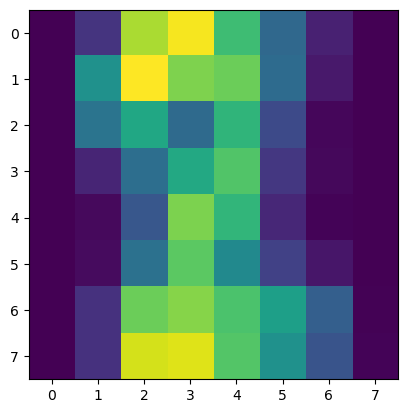

In [2]:
from scipy.spatial.distance import cdist


def kmeans(Xs, K=10, num_iter=1000):
    # Get the shape of the data
    (N, D) = Xs.shape

    # Initialize cluster centers randomly 
    means = 2.0 * np.random.rand(K, D) - 1.0

    # Perform K-means iterations
    for _ in range(num_iter):
        # Compute distances between data points and cluster centers
        distances = cdist(Xs, means)

        # Assign each data point to the cluster with the closest center
        I = np.argmin(distances, axis=1)

        # Update cluster centers using vectorized operations
        means = np.array([np.mean(Xs[I == c], axis=0) for c in range(K)])

    # Final assignment of data points to clusters
    I = np.argmin(distances, axis=1)
    return means, I


# Example usage
(means, cluster_assignments) = kmeans(Xs)
# Inverse transform means (if applicable)
means = scaler.inverse_transform(means)

# Display an image of the cluster center for cluster 5
plt.imshow(means[5].reshape(8, 8))

It's important to note that K-means is sensitive to initialization, and the quality of the clusters depends on the data and the chosen hyperparameters


Inertia per cluster:
Cluster 0: 5370.94
Cluster 1: 13260.88
Cluster 2: 8136.22
Cluster 3: 2962.47
Cluster 4: 14759.86
Cluster 5: 3728.37
Cluster 6: 3322.59
Cluster 7: 5152.36
Cluster 8: 3544.58
Cluster 9: 9166.16

The minimum inertia is 2962.47 for cluster number 3


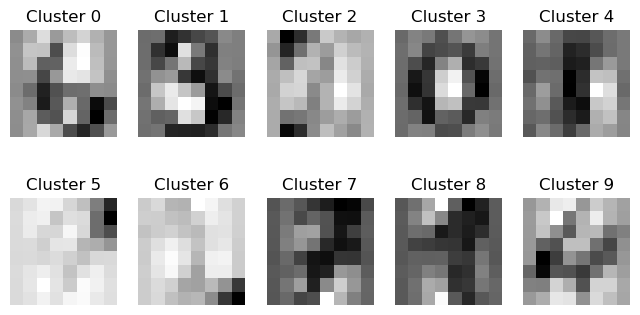

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Perform K-means clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42, n_init=1000)
kmeans.fit(Xs)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_  # The actual centroids
labels = kmeans.labels_

# Calculate inertia per cluster
inertia_per_cluster = np.zeros(10)
for i in range(10):
    cluster_points = Xs[labels == i]
    inertia_per_cluster[i] = np.sum((cluster_points - cluster_centers[i]) ** 2)

# Print the results
print("\nInertia per cluster:")
for i, inertia in enumerate(inertia_per_cluster):
    print(f"Cluster {i}: {inertia:.2f}")

print(
    f"\nThe minimum inertia is {inertia_per_cluster.min():.2f} for cluster number {inertia_per_cluster.argmin()}")

#Calculate the average silhouette score to compare cohesion
#silhouette_avg = silhouette_score(Xs, labels)
#print(f"The average silhouette score is: {silhouette_avg:.2f}")

# Visualize the cluster centers
fig, ax = plt.subplots(2, 5, figsize=(8, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(cluster_centers[i].reshape(8, 8), cmap='binary')
    axi.set_title(f"Cluster {i}")
    axi.axis('off')

plt.show()


In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

def silhouette_for_cluster(Xs, labels):
    """
    Calculate and print silhouette scores for each cluster and the average silhouette score.

    Parameters:
    - Xs: Input data
    - labels: Cluster labels assigned to each data point
    """
    # Calculate silhouette scores for each data point
    silhouette_values = silhouette_samples(Xs, labels)
    
    # Initialize an array to store silhouette scores for each cluster
    cluster_silhouette_scores = np.zeros(10)
    
    # Loop through each cluster
    for i in range(10):
        # Create a boolean mask for the current cluster
        cluster_mask = (labels == i)
        
        # Calculate the mean silhouette score for the current cluster
        cluster_silhouette_scores[i] = np.mean(silhouette_values[cluster_mask])
        
        # Print the silhouette score for the current cluster
        print(f"Silhouette score for cluster {i}: {cluster_silhouette_scores[i]:.2f}")

    # Calculate and print the average silhouette score for the entire dataset
    silhouette_avg = silhouette_score(Xs, labels)
    print(f"\nThe average silhouette score is: {silhouette_avg:.2f}")

# Example usage
silhouette_for_cluster(Xs, labels)


Silhouette score for cluster 0: 0.22
Silhouette score for cluster 1: 0.11
Silhouette score for cluster 2: 0.07
Silhouette score for cluster 3: 0.35
Silhouette score for cluster 4: 0.07
Silhouette score for cluster 5: 0.06
Silhouette score for cluster 6: 0.17
Silhouette score for cluster 7: 0.20
Silhouette score for cluster 8: 0.18
Silhouette score for cluster 9: 0.08

The average silhouette score is: 0.15


**MY ANALYSIS:**
 The code is pretty easy. We use the KMeans class to perform K-means clustering and the inertia is calculated for each cluster --> lower inertia indicates tighter cluster.
The plot shows us the the image of a cluster center.
however, inertia does not seem to me to be the best way to analyze the dispersion of values relating to a given cluster. If we had as many clusters as points we could have an inertia equal to 0. To avoid this situation we use the silhouette score method.


The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It quantifies the separation distance between clusters.
On the other hand, the inertia, or within-cluster sum of squares, measures how far the points within a cluster are from the centroid of that cluster. It is a measure of the compactness of the clusters. While inertia is an internal evaluation metric specific to K-means, the silhouette score is a more general measure of cluster quality that can be used across different clustering algorithms. It provides additional insights into the cohesion and separation of clusters. A higher silhouette score suggests better-defined clusters.

As expected, the average value of the silhouette method is 0.15, this means that we have overlapping clusters. This will be confirmed in the next section. Anyway, we can see that some silhouette scores are decently high and this means that some numbers are well matched.

**COOL**
In the context of the K-means algorithm applied to the digits dataset, each centroid would represent the average pixel values of the digits within a particular cluster, so a color.

### Exercise 1.2: Transforming our clustering into a classifier
Now use the labels in `ys` to compute a probability distribution over all classes (i.e. a *histogram*) for each cluster. Write a function that, given a test sample $\mathbf{x}$, returns the class with maximum likelihood given by the closest cluster center. Evaluate your classifier. Compute the entropy for each cluster based on your estimated probability distributiont. Does the entropy of a cluster correlate to misclassifications of test samples closest to it?

**Note**: since you will be testing this classifier, you will want to carefully split the data into *training* and *test* splits.



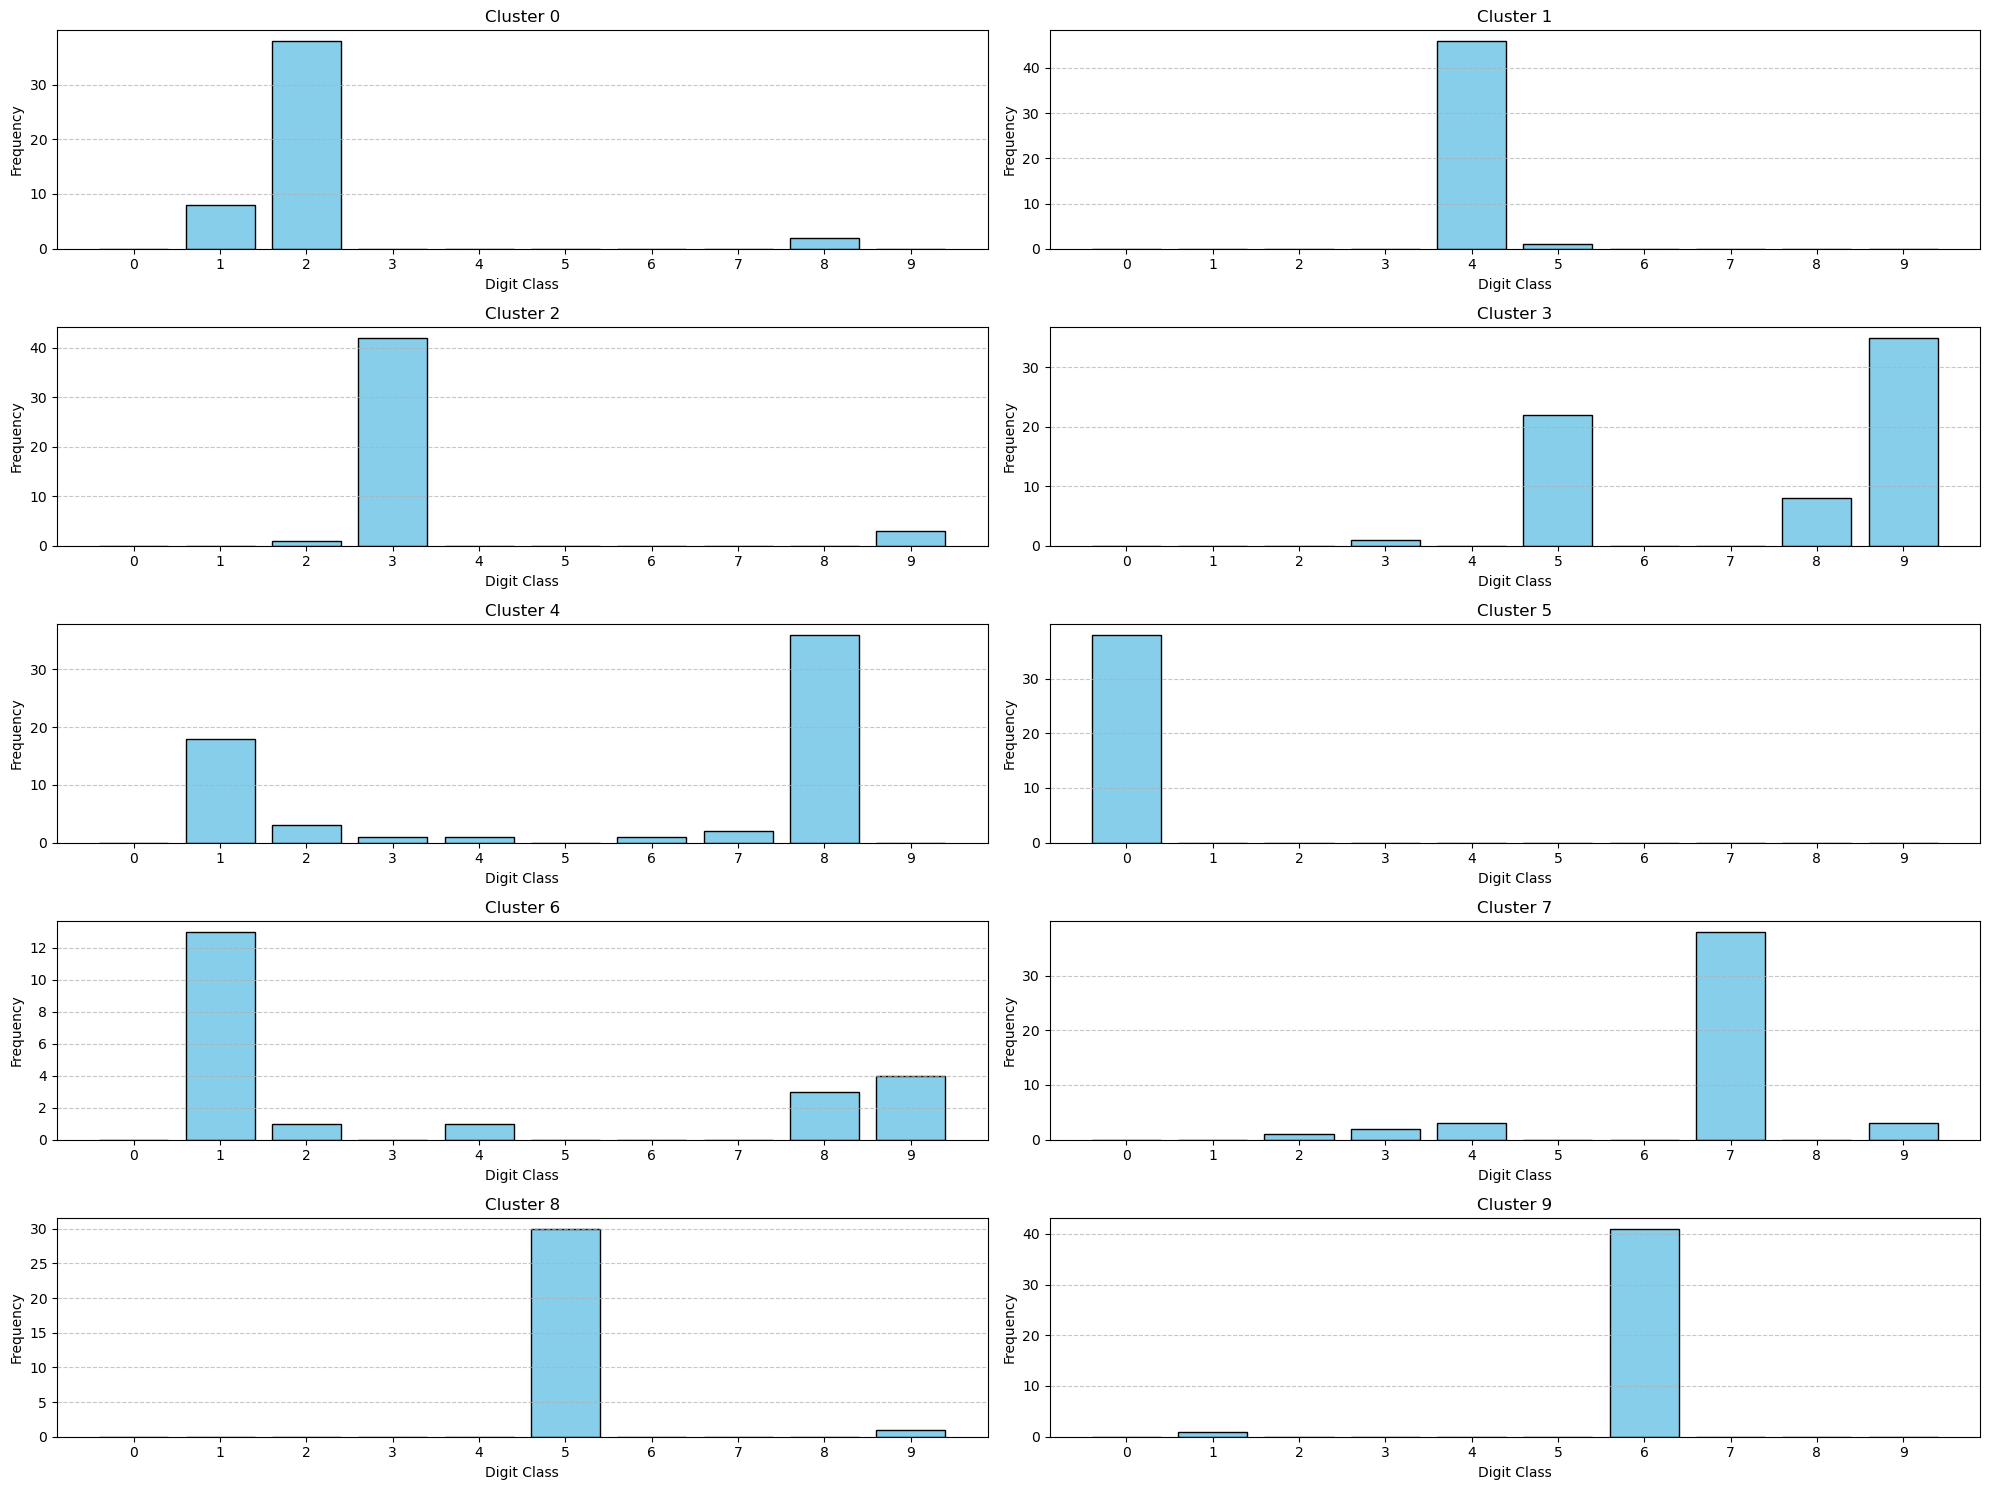

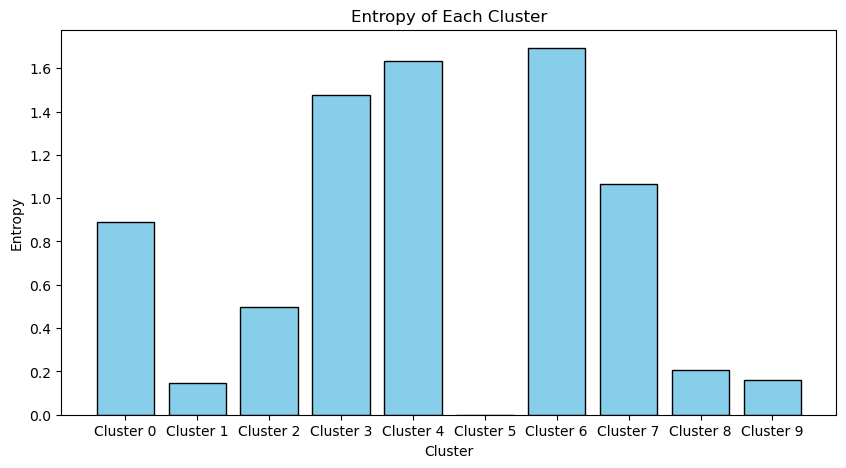

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Split the dataset into training and test sets
Xtr, Xte, ytr, yte = train_test_split(df_digits, targets_digits, test_size=0.75)

# Fit K-means clustering on the training data
kmeans.fit(Xtr)
cluster_labels = kmeans.predict(Xtr)

def entropy(probabilities):
    # Remove zero probabilities to avoid log(0) issues
    non_zero_probs = probabilities[probabilities > 0]

    # Calculate entropy using the formula
    entropy_value = -np.sum(non_zero_probs * np.log2(non_zero_probs))
    return entropy_value

def plot_cluster_histograms_probabilities(cluster_labels, true_labels):
    unique_clusters = np.unique(cluster_labels)
    num_clusters = len(unique_clusters)
    
    cluster_probabilities = []

    # Define the number of rows and columns for subplots
    rows = (num_clusters + 1) // 2  # Ensure an even number of subplots in each row
    cols = 2

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

    for i, cluster_id in enumerate(unique_clusters):
        mask = (cluster_labels == cluster_id)
        cluster_classes = true_labels[mask]

        # Calculate relative frequencies (probabilities) for each class
        class_counts = np.bincount(cluster_classes)
        class_probabilities = class_counts / len(cluster_classes)

        cluster_probabilities.append(class_probabilities)
        
        # Determine subplot position
        if rows > 1:
            ax = axes[i // cols, i % cols]
        else:
            ax = axes[i]
        # Plot histogram for the current cluster
        ax.hist(cluster_classes, bins=np.arange(11) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')
        ax.set_title(f'Cluster {cluster_id}')
        ax.set_xlabel('Digit Class')
        ax.set_ylabel('Frequency')
        ax.set_xticks(range(10))
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        
    # Adjust layout and show the subplots
    plt.tight_layout()
    
    # Compute cluster entropies after plotting
    cluster_entropies = [entropy(probabilities) for probabilities in cluster_probabilities]

    # Plot the bar chart for cluster entropies
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(cluster_entropies)), cluster_entropies, color='skyblue', edgecolor='black')
    plt.xlabel('Cluster')
    plt.ylabel('Entropy')
    plt.title('Entropy of Each Cluster')
    plt.xticks(range(len(cluster_entropies)), labels=[f'Cluster {i}' for i in range(len(cluster_entropies))])
    plt.show()
    
    return cluster_probabilities

# Example: Plot histograms for each cluster and compute cluster entropies
cluster_probabilities = plot_cluster_histograms_probabilities(cluster_labels, ytr)

As predicted in the past point, we see the histogram about the distribution probability. Some cluster owns different values of the digit classes and this means that have some overlapping clusters. Also with the entropy calculation we can verify our hypothesis. in some clusters having overlapping values ​​the entropy is higher. A 0 entropy value means that in that cluster we don't have overlapping values.

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

class KMClassifier:
    def __init__(self, K=10, num_classes=10):
        self.K_ = K
        self.model_ = KMeans(n_clusters=K, n_init="auto")
        self.num_classes = num_classes
        self.labels_ = None

    def fit(self, Xs, ys):
        self.model_.fit(Xs)
        self.labels_ = []

        # Count occurrences of each class in each cluster
        for c in range(self.K_):
            assigned = ys[self.model_.labels_ == c]
            self.labels_.append(np.array([(assigned == cls).sum() for cls in range(self.num_classes)]))

        # Assign the class with the maximum occurrences as the label for each cluster
        self.labels_ = np.argmax(np.vstack(self.labels_), axis=1)

    def predict(self, Xs):
        distances = cdist(Xs, self.model_.cluster_centers_)
        return self.labels_[np.argmin(distances, axis=1)]

# Example usage
model = KMClassifier()
model.fit(Xtr, ytr)
accuracy = (model.predict(Xte) == yte).mean()

print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7218


An accuracy of 72% suggests that the model performs moderately well on the training data.
However, the performance might be influenced by the choice of K and the inherent limitations of the K-Means algorithm.

In [7]:
from sklearn.svm import LinearSVC

class LinearSVCClassifier:
    def __init__(self):
        self.model_ = LinearSVC(dual="auto")

    def fit(self, Xs, ys):
        self.model_.fit(Xs, ys)

    def predict(self, Xs):
        return self.model_.predict(Xs)

    def evaluate_accuracy(self, Xs, ys):
        accuracy = (self.predict(Xs) == ys).mean()
        return accuracy


# Example usage
svc_model = LinearSVCClassifier()
svc_model.fit(Xtr, ytr)
accuracy = svc_model.evaluate_accuracy(Xte, yte)

print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8872


An accuracy of 88% indicates that the LinearSVC model performs well on the provided training data.

**COOL:** During different runs of the code seems that with 10 clusters the number 1 and 8 is often confused. This may be the reason why we always see a cluster with 2 equal columns.

## 2. Gaussian Mixture Models and Expectation Maximization
In this set of exercises we will experiment with fitting a Gaussian Mixture Model (GMM) to the digits dataset.  

### Exercise 2.1: Fitting a GMM
Fit a GMM (using `sklearn.mixture.GaussianMixture`) with 10 mixture components to the digits dataset. 

In [8]:
from  sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10)
gmm.fit(Xtr)

gmm.predict_proba(Xtr).shape
gmm.weights_

array([0.06681514, 0.17371938, 0.10467706, 0.10467706, 0.08463252,
       0.0935412 , 0.10690423, 0.15812918, 0.04454343, 0.0623608 ])

### Exercise 2.2: Transforming the GMM into a classifier
Use the `predict_proba()` method of your fit GMM to obtain the probability distribution over the mixture components for all samples in the training set. Use these, together with the true labels `ys`, to construct a classifier as above with K-means. Evaluate your classifier. Repeat the experiment with more mixture components.

The accuracy for number of components 1 is:  0.1795
The accuracy for number of components 2 is:  0.2856
The accuracy for number of components 3 is:  0.3731
The accuracy for number of components 4 is:  0.4837
The accuracy for number of components 5 is:  0.5749
The accuracy for number of components 6 is:  0.5912
The accuracy for number of components 7 is:  0.6988
The accuracy for number of components 8 is:  0.7789
The accuracy for number of components 9 is:  0.7567
The accuracy for number of components 10 is:  0.7819
The accuracy for number of components 11 is:  0.7915
The accuracy for number of components 12 is:  0.8813
The accuracy for number of components 13 is:  0.8694
The accuracy for number of components 14 is:  0.7945
The accuracy for number of components 15 is:  0.8004
The accuracy for number of components 16 is:  0.8650
The accuracy for number of components 17 is:  0.8665
The accuracy for number of components 18 is:  0.8598
The accuracy for number of components 19 is:  0.8442


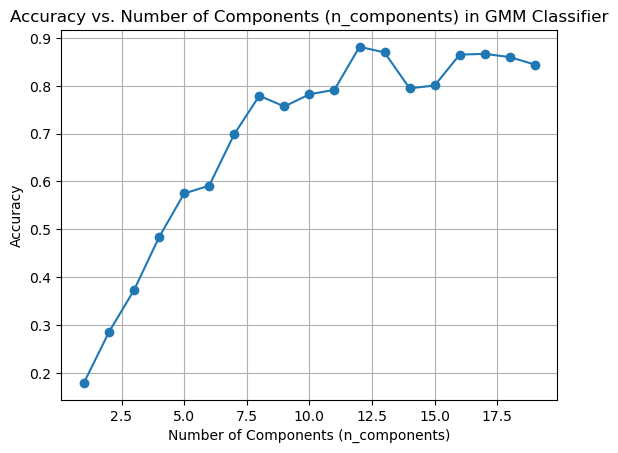

In [9]:
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist
from sklearn import mixture

class GMMClassifier:
    def __init__(self, K=10, num_classes=10):
        self.K_ = K
        self.model_ = GaussianMixture(n_components=K)
        self.num_classes = num_classes
    

    def fit(self, Xs, ys):
        self.model_.fit(Xs)
        self.labels_ = np.argmax(self.model_.predict_proba(Xs), 1)
        class_count = []
        
        # Count occurrences of each class in each cluster
        for c in range(self.K_):
            
            assigned = ys[self.labels_ == c]
            class_count.append(np.array([(assigned == cls).sum() for cls in range(self.num_classes)]))

        # Assign the class with the maximum occurrences as the label for each cluster
        self.labels_ = np.argmax(np.vstack(class_count), 1)

    def predict(self, Xs):
        distances = cdist(Xs, self.model_.means_)
        return self.labels_[np.argmin(distances, axis=1)]

accuracies = []

n_components_values = range(1, 20)  # You can adjust the range as needed

for i in n_components_values:
    GMMmodel = GMMClassifier(K=i+1)
    GMMmodel.fit(Xtr, ytr)
    accuracy = (GMMmodel.predict(Xte) == yte).mean()
    accuracies.append(accuracy)
    print(f"The accuracy for number of components {i} is:  {accuracy:.4f}")

# Plotting the results
plt.plot(n_components_values, accuracies, marker='o')
plt.title('Accuracy vs. Number of Components (n_components) in GMM Classifier')
plt.xlabel('Number of Components (n_components)')
plt.ylabel(f'Accuracy')
plt.grid(True)
plt.show()

As expected from the past analysis we can see a better accuracy progressively increasing the number of components for the GMM. With the past plots we saw that some clusters had some overlapping values and if we increase the number of components over 10, we reach a a good accuracy score around 12. If we increase again the number of components we see a better accuracy but not as good in comparison with the past increments. This means to me that the sweet spot is around 12. So increasing the number of components in the Gaussian Mixture Model (GMM) initially led to better accuracy, indicating that a more complex model captures the underlying structure of the data more accurately. However, we noticed diminishing returns in accuracy as you further increased the number of components. This observation aligns with the idea of finding a balance between model complexity and generalization.

### Exercise 2.3: Sampling from the GMM
Use the `sample()` method on a GMM fit to the digits data to generate random samples from the learned distribution. Visualize these samples in the original feature space. Are there some digits better reconstructed than others? How might you determine *which* ones are better captured?

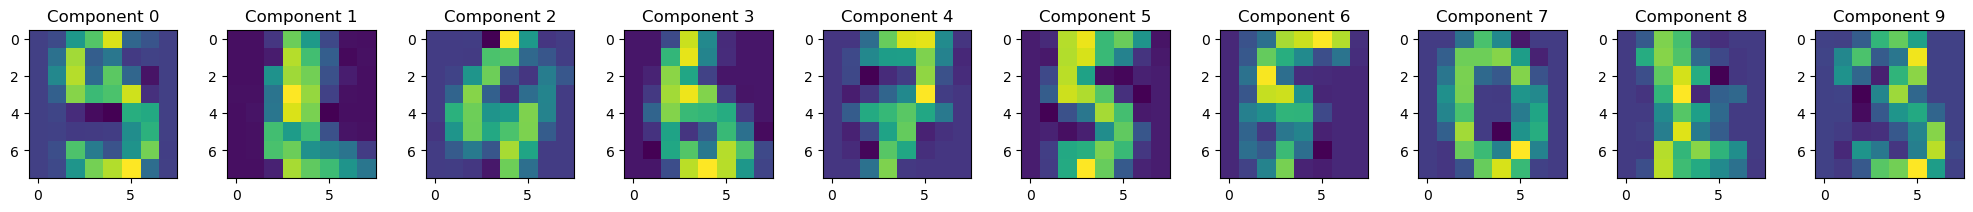

In [10]:
# Your code here.
from scipy.stats import multivariate_normal

fig, axes = plt.subplots(1, 10, figsize=(20, 2))

for i in range(10):
# Get the parameters (mean and covariance) of the first component
    mean_component = GMMmodel.model_.means_[i]
    covariance_component = GMMmodel.model_.covariances_[i]

    # Create a multivariate normal distribution using the obtained parameters
    mvn_distribution = multivariate_normal(mean_component, covariance_component)

    # Generate a sample from the multivariate normal distribution
    sample = mvn_distribution.rvs()
    
    axes[i].imshow(sample.reshape(8, 8))
    axes[i].set_title(f'Component {i}')

# Reshape the sample and display it as an image
plt.tight_layout()
plt.show()

The results speaks for themselfs. With the same number of components there are some cluster that are not well represented. It seems to me that the better way to identify a well reconstructed digits is visualing the images. We can see that some components are readable.

## 3. Principal Component Analysis
In this set of exercises we will see how Principal Component Analysis (PCA) can be used to *simplify* the representation of input data in order to make visualize them or to make learning more stable. 

### Exercise 3.1: Fitting a Bayesian Generative Model

Fit a *Quadratic* generative model (e.g. `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()`) to the Digits dataset. Observe *all* warnings that the model fitting procedure returns. How well does the trained model work?

**Note**: Since we are using a *supervised* model as a downstream task, you should *split* the dataset into training and test sets. 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(ds_digits.data, ds_digits.target, test_size=0.2, random_state=42)

# Create a Quadratic Discriminant Analysis (QDA) model
qda_model = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the training data
qda_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = qda_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8556


/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA gives a 0.85 accuracy wich is good. Using this model introduces the famous warning message that indicates that there is high multicollinearity among the features. This means that some features in the dataset are highly correlated or can be linearly predicted from others.

## Exercise 3.2: Removing "redundant" dimensions

Use *Principal Component Analysis (PCA)* to reduce the dimensionality of the digits dataset. You can use `sklearn.decomposition.PCA` for this. You should think carefully about how to choose the *number* of principal components to use. You should also think *very carefully* about which data is used to estimate the principal components. Use the transformed dataset to train and test a Bayes Quadratic classifier.

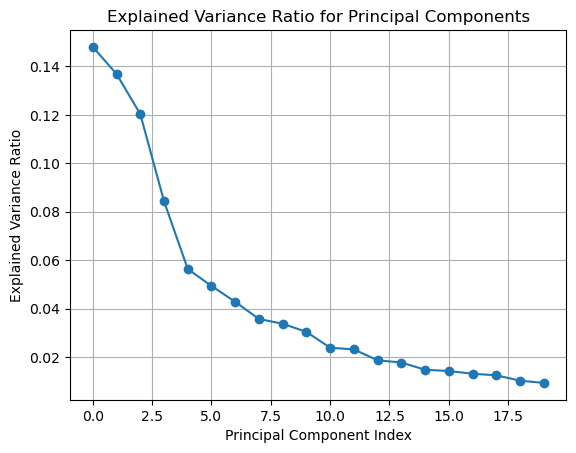

In [12]:
# Import necessary libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA with 20 components
pca = PCA(n_components=20)

# Fit and transform the training data
Xs_train_trans = pca.fit_transform(X_train)

# Transform the test data using the fitted PCA
Xs_test_trans = pca.transform(X_test)

# Plot the explained variance ratio for each principal component
explained_var_ratio = pca.explained_variance_ratio_
plt.plot(explained_var_ratio, marker='o')
plt.title('Explained Variance Ratio for Principal Components')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


This code performs Principal Component Analysis (PCA) on the training data, reduces the dimensionality to 20 components.

Accuracy after PCA transformation: 0.9889 (significant improvement)


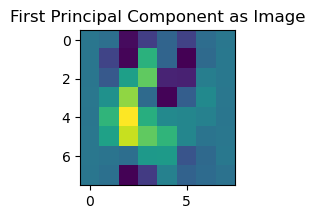

In [13]:
# Fit the QDA model on the transformed training data
qda_model.fit(Xs_train_trans, y_train)

# Evaluate the accuracy on the transformed test data
accuracy = (qda_model.predict(Xs_test_trans) == y_test).mean()
print(f"Accuracy after PCA transformation: {accuracy:.4f} (significant improvement)")

# Visualize the first principal component as an image
plt.figure(figsize=(2, 3))
plt.imshow(pca.components_[0].reshape(8, 8))
plt.title('First Principal Component as Image')
plt.show()


Reducing the dimensionality leads to a better accuracy score. When you apply PCA, it transforms the original features into a new set of orthogonal features (principal components) that capture the most significant variations in the data.

### Exercise 3.3: PCA as a visualization tool

Transform the Digits dataset onto only *two* dimensions and visualize the dataset using a scatterplot. You can use `ys` to *color* the points in the scatterplot according to the true classes. Do the classes form natural clusters? Do some of them?

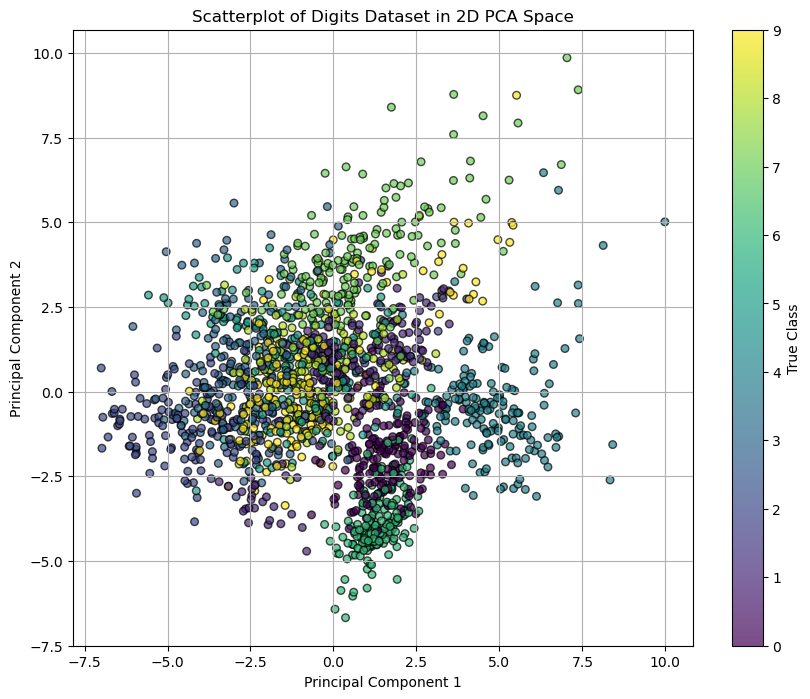

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA with two components
pca = PCA(n_components=2)
Xs_2d = pca.fit_transform(Xs)

# Create a scatterplot with true class colors
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Xs_2d[:, 0], Xs_2d[:, 1], c=ys, cmap='viridis', edgecolor='k', s=30, alpha=0.7)
plt.colorbar(scatter, label='True Class')
plt.title('Scatterplot of Digits Dataset in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



The resulting scatterplot visualizes the Digits dataset in a 2D space, where each point represents a digit, and the colors correspond to their true class labels. This visualization is helpful for understanding the distribution and potential clusters in the reduced feature space obtained through PCA. Using this representation we can identify just a couple of natural cluster.

### Exercise 3.4: TSNE for *better* visualization
PCA is severely limited by the fact that it finds a *linear* manifold of the original data. Use `sklearn.manifold.TSNE` instead to learn a 2-dimensional *nonlinear* manifold of digits. Repeat the visualization like before.

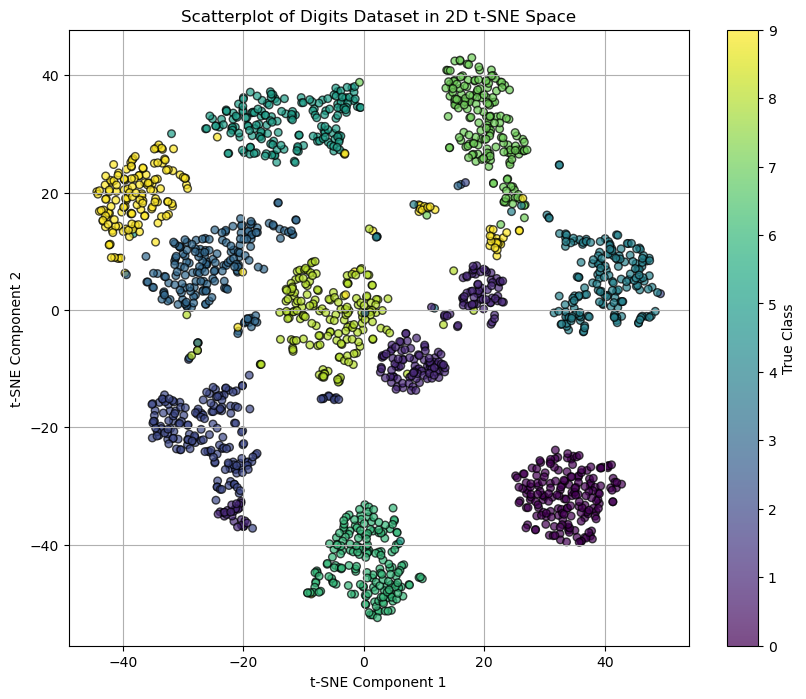

In [15]:
from sklearn.manifold import TSNE

# Perform t-SNE with two components
tsne = TSNE(n_components=2, random_state=42)
Xs_tsne = tsne.fit_transform(Xs)

# Create a scatterplot with true class colors
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Xs_tsne[:, 0], Xs_tsne[:, 1], c=ys, cmap='viridis', edgecolor='k', s=30, alpha=0.7)
plt.colorbar(scatter, label='True Class')
plt.title('Scatterplot of Digits Dataset in 2D t-SNE Space')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


The resulting scatterplot visualizes the Digits dataset in a 2D t-SNE space, where each point represents a digit, and the colors correspond to their true class labels. t-SNE is particularly useful for capturing non-linear relationships in the data, and this visualization helps reveal potential clusters and patterns in the reduced feature space.

**FINAL ANALYSIS**

Since the begin of this laboratory was clear that the digit dataset presents some overlapping values for a low number of clusters. Increasing this values bring us a way better accuracy score for all the methods used.